In [20]:
from core.models.graph_autoencoder import GraphAutoencoder
from core.data.unimers import UnimersData

from yaml import safe_load

import torch

import matplotlib.pyplot as plt

In [12]:
data_hparams = safe_load(open("/remote/gpu04/hummerich/mol-fff/mol-fff/config/unimers_autoencoder.yaml"))[
    "data_hparams"
]
data = UnimersData(UnimersData.hparams_schema.from_dict(data_hparams))

/remote/gpu04/hummerich/mol-fff/.venv/lib/python3.11/site-packages/torch_geometric/data/dataset.py:240: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, pass `force_reload=True` explicitly to reload the dataset.
  warnings.warn(


In [9]:
model = GraphAutoencoder.load_from_wandb_artifact(
    "hummerichsander-heidelberg-university/MolFFF/model-0xuvx26o:v658"
).eval()

wandb:   1 of 1 files downloaded.  


In [17]:
batch = next(iter(data.test_loader)).to(model.device)

with torch.no_grad():
    h = model.encode(batch.x, batch.edge_index, batch.edge_attr)

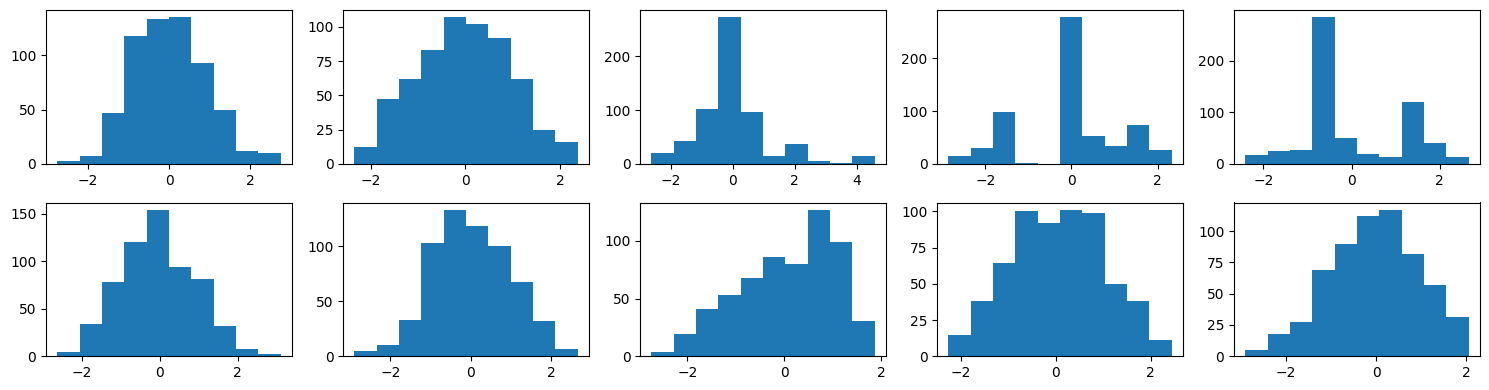

In [25]:
fig = plt.figure(figsize=(15, 4))

for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1)
    ax.hist(h[..., i].cpu().numpy())
    plt.tight_layout()